## Project ##

### 1. **Ravella Vikhil**
   - **Role**: Project Lead / AI Intern
   - **Responsibilities**:
     - Developed the Rice image classification system model using Convolutional Neural Networks (CNN).
     - Handled dataset collection, preprocessing, and augmentation.
     - Conducted training and evaluation of the model.
     - Integrated the model for real-time usage and deployment.
     - Wrote the documentation and contributed to the project’s setup.


### Dataset Selection

In this section, we will walk through the steps to select and use datasets from the website [Murat Koklu's Datasets](https://www.muratkoklu.com/datasets/).

#### Step 1: Navigate to the Datasets Page
1. Open your browser and go to the datasets page: [Murat Koklu's Datasets](https://www.muratkoklu.com/datasets/).
2. The page contains several datasets related to various machine learning and computer vision tasks.

#### Step 2: Review the Available Datasets
1. Browse through the available datasets on the page.
2. Each dataset typically includes a brief description and the types of data it contains, such as images, labels, etc.
3. Make sure the dataset matches your project requirements. For example, if you need image datasets,Rice image , check the datasets that offer image files along with annotations.


###requirements = """
tensorflow
numpy
pandas
matplotlib
scikit-learn
opencv-python
Pillow
h5py
"""
### pip install -r requirements.txt
t

In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import os
from IPython.display import display, HTML
import shutil
from sklearn.model_selection import train_test_split

### Dataset Preparation and Splitting

#### 3.1 Overview of Dataset Organization
The rice image dataset is organized into multiple subdirectories, where each subdirectory corresponds to a specific rice variety. Each subdirectory contains images of rice samples that belong to the respective variety. This structure allows the model to learn to classify images based on the rice variety they belong to. 

This chapter outlines the process of splitting the dataset into two distinct sets:

1. **Training Set**: This set is used to train the machine learning model. The model will learn the patterns and features from this data.
   
2. **Validation Set**: This set is used to evaluate the model's performance during training. The validation set is used to tune the model's hyperparameters and assess the model's ability to generalize to unseen data.

Proper dataset splitting is essential to ensure that the model is trained on one set of data and evaluated on a separate, unseen set of data to avoid overfitting.


In [27]:

# Define paths
source_dir = r'C:\Users\ravel\Desktop\content\Rice_Image_Dataset'  # Dataset directory
train_dir = r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\train"  # Train directory
val_dir = r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\val"  # Validation directory

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each category folder in the source directory
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)

    if os.path.isdir(class_path):  # Check if it is a directory
        # Create subdirectories for train and validation sets for each class
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Get all image paths for the current class
        image_paths = [
            os.path.join(class_path, fname)
            for fname in os.listdir(class_path)
            if fname.endswith(('.jpg', '.jpeg', '.png'))
        ]

        if not image_paths:
            print(f"No images found for class '{class_name}'. Skipping...")
            continue

        # Split the dataset into training and validation sets (80% train, 20% validation)
        train_paths, val_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

        # Move the files to the train and validation directories
        for path in train_paths:
            shutil.copy(path, os.path.join(train_dir, class_name, os.path.basename(path)))

        for path in val_paths:
            shutil.copy(path, os.path.join(val_dir, class_name, os.path.basename(path)))

        # Print class-wise dataset split
        print(f"Class '{class_name}' - Train: {len(train_paths)} images, Validation: {len(val_paths)} images")

print("Dataset split complete.")


Class 'Arborio' - Train: 12000 images, Validation: 3000 images
Class 'Basmati' - Train: 12000 images, Validation: 3000 images
Class 'Ipsala' - Train: 12000 images, Validation: 3000 images
Class 'Jasmine' - Train: 12000 images, Validation: 3000 images
Class 'Karacadag' - Train: 12000 images, Validation: 3000 images
No images found for class 'train'. Skipping...
No images found for class 'val'. Skipping...
Dataset split complete.


## Plotting Training and Validation Loss and Accuracy

In this section, we visualize the training and validation performance of our model over the epochs. We plot two key metrics: **Loss** and **Accuracy**. The plots help in understanding how well the model is learning and whether it is overfitting or underfitting.

### 1. Loss Over Epochs:
The first subplot shows the **training loss** and **validation loss** over the epochs. 
- The **training loss** is plotted with the blue line.
- The **validation loss** is plotted with the orange line.

By examining the loss curves, we can monitor whether the model is minimizing the loss effectively for both the training and validation data.

### 2. Accuracy Over Epochs:
The second subplot displays the **training accuracy** and **validation accuracy** over the epochs.
- The **training accuracy** is plotted with the blue line.
- The **validation accuracy** is plotted with the orange line.

This allows us to evaluate how well the model is generalizing to unseen data, which is represented by the validation set.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to training and validation directories
train_dir = r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\train"
validation_dir =r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\val"

# Define the sample size for each class
samples_per_class = 32  # Adjust this as needed

# Initialize ImageDataGenerator for rescaling the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Corrected path to training images
    target_size=(224, 224),  # Resize the images
    batch_size=samples_per_class,  # Adjust as per your dataset
    class_mode='categorical',  # Multi-class classification
      # Specify if you want a training subset
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,  # Corrected path to validation images
    target_size=(224, 224),  # Resize the images
    batch_size=samples_per_class,  # Adjust as per your dataset
    class_mode='categorical',  # Multi-class classification
      # Specify if you want a validation subset
)


Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [4]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
     

(32, 224, 224, 3)
(32, 5)


# Dataset Preprocessing and Augmentation

## 3.1 Overview of Data Augmentation and Standardization
In this section, we outline the preprocessing steps applied to the rice image dataset. The training data undergoes augmentation to increase diversity, while the validation data is standardized to maintain consistency with the training data for accurate evaluation.

## 3.2 Code Implementation for Image Data Augmentation and Standardization
This code implements the preprocessing techniques using the `ImageDataGenerator` class in Keras. The training data is augmented with random transformations such as shifting, flipping, and rotation, while the validation data is simply rescaled for normalization.

### Training Data Augmentation
The training dataset undergoes various transformations to help the model generalize better and avoid overfitting.

### Validation Data Standardization
The validation dataset is rescaled to ensure it matches the scale of the training data, allowing for unbiased evaluation.


In [5]:
# Training Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 20,
                                   validation_split=0.5)

# Validation dataset: standardization

validation_datagen = ImageDataGenerator(rescale=1/255,
                                        validation_split=0.5)

# Training Data Loader

## 3.3 Overview of the Training Data Loader
The training data loader is responsible for loading and augmenting the rice image dataset to prepare it for training. It applies data augmentation techniques such as random shifts, flips, and rotations, ensuring that the model is exposed to diverse variations of the images. This helps the model to generalize better and avoid overfitting.

## 3.4 Code Implementation for the Training Data Loader


In [6]:
# Training data loader

train_generator = train_datagen.flow_from_directory(r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\train",
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=1)                                                                    


Found 30000 images belonging to 5 classes.


# Validation Data Loader

## 3.5 Overview of the Validation Data Loader
The validation data loader is used to load and preprocess images for model validation. Unlike the training data, the validation data is not augmented, as it should reflect the real-world data distribution. This data loader resizes images, applies standardization, and prepares batches for validation during or after the training process.

## 3.6 Code Implementation for the Validation Data Loader

In [7]:
# Validation data loader

validation_generator = validation_datagen.flow_from_directory(r"C:\Users\ravel\Desktop\content\Rice_Image_Dataset\val",
                                                              target_size=(224,224),
                                                              color_mode='rgb',
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              subset='validation',
                                                              shuffle=False,
                                                              seed=1) 

Found 7500 images belonging to 5 classes.


In [8]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 5)


# CNN Model1 Architecture for Rice Image Classification

## 1. Overview
This Convolutional Neural Network (CNN) is designed to classify rice images into multiple categories. The architecture consists of two convolutional layers followed by a global max pooling layer and a dense output layer for classification.

### Model Structure:
- **Input Layer**: Accepts images of size 224x224 with 3 color channels (RGB).
- **First Convolutional Layer**: Applies 32 filters of size 3x3 with ReLU activation and max pooling with a pool size of 3x3.
- **Second Convolutional Layer**: Applies 64 filters of size 3x3 with ReLU activation.
- **Global Max Pooling**: Reduces the spatial dimensions of the feature map to a single value per feature map.
- **Output Layer**: A dense layer with a softmax activation function for multi-class classification.


<h1 style="font-size: 36px; text-align: center;">Model 1</h1>


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define number of classes for your output layer
num_classes = 5  # Adjust this based on your dataset

# Architecture definition
inputs = tf.keras.Input(shape=(224, 224, 3))

# First Convolutional Layer
x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=3, padding='same')(x)

# Second Convolutional Layer
x = layers.Conv2D(64, (3, 3), padding='same')(x)
x = layers.Activation('relu')(x)

# Global Max Pooling Layer
x = layers.GlobalMaxPooling2D()(x)

# Output Layer
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Define the Model
model = models.Model(inputs, outputs)
net = tf.keras.Model(inputs, outputs)
# Print model summary to check the architecture
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,717 (77.02 KB)

 Trainable params: 19,717 (77.02 KB)

 Non-trainable params: 0 (0.00 B)

# Model Architecture Plot

To visualize the architecture of your model, you can use the `plot_model` function from `keras.utils`. The following code will generate a plot of the model and save it as an image file:


In [12]:
# Architecture plot
tf.keras.utils.plot_model(net)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Model Compilation

To compile the model, we use the following parameters:


In [15]:
net.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


## Model Training

The model is trained using the `fit` method with the following parameters:

In [16]:
history = net.fit(train_generator,
                  epochs = 40,
                  validation_data = validation_generator);

C:\Users\ravel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 736s 782ms/step - accuracy: 0.4482 - loss: 1.3296 - val_accuracy: 0.4913 - val_loss: 1.1696
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 478s 510ms/step - accuracy: 0.8584 - loss: 0.4795 - val_accuracy: 0.8132 - val_loss: 0.4222
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 491s 524ms/step - accuracy: 0.9200 - loss: 0.2579 - val_accuracy: 0.8509 - val_loss: 0.3309
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 490s 522ms/step - accuracy: 0.9421 - loss: 0.1844 - val_accuracy: 0.9348 - val_loss: 0.1702
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 492s 525ms/step - accuracy: 0.9540 - loss: 0.1403 - val_accuracy: 0.9213 - val_loss: 0.2275
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 491s 523ms/step - accuracy: 0.9635 - loss: 0.1166 - val_accuracy: 0.9323 - val_loss: 0.1833
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 427s 455ms/step - accuracy: 0.9675 - loss: 0.0998 - val_accuracy: 0.9523 - val_loss: 0.1285
Epoch 8/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 238s 254ms/step - accuracy: 0.9688 -

## Learning Curves Visualization

After training the model, it is important to visualize the learning curves to monitor the progress of the model's loss and accuracy during training and validation. This helps to understand how well the model is learning and if there is any overfitting.

### Saving the Model

First, the trained model is saved to a `.h5` file for future use:

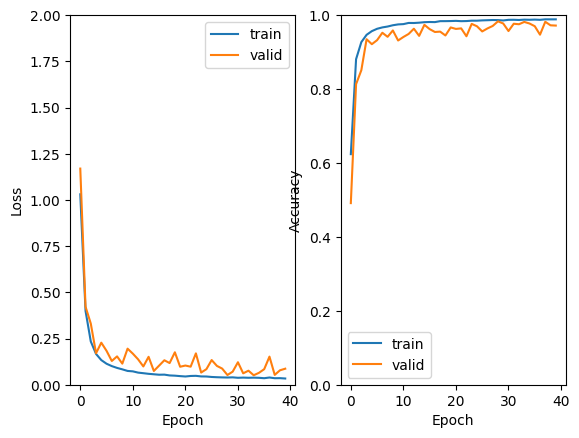

In [22]:
# Learning curves visualization
model.save('rice1_classifier_model_with_rmsprop.h5')
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

## Model Architecture with Regularization and Batch Normalization

In this model2, we create a Convolutional Neural Network (CNN) that uses regularization (L2) and batch normalization techniques to improve the model's performance and generalization. Below is a breakdown of the architecture:

### Architecture Overview

1. **Input Layer**:
   - The input layer expects an image of size 224x224 pixels with 3 color channels (RGB).

2. **First Convolutional Layer**:
   - Convolution with 32 filters, a kernel size of 3x3, and 'same' padding to preserve the spatial dimensions.
   - **L2 Regularization**: This helps to prevent overfitting by penalizing large weights.
   - **He Uniform Initialization**: It initializes the weights using a uniform distribution, with a variance based on the number of inputs to the layer.
   - **Batch Normalization**: Helps to stabilize and accelerate training by normalizing the inputs of each layer.
   - **ReLU Activation**: Introduces non-linearity.
   - **Max Pooling**: Reduces the spatial dimensions of the feature map, using a pool size of 3x3 and stride 3.

3. **Second Convolutional Layer**:
   - Similar to the first convolutional layer but with 64 filters to learn more complex features.
   - It uses the same regularization, initialization, batch normalization, and activation.

4. **Third Convolutional Layer**:
   - This layer has 128 filters to capture even more intricate features in the image.
   - Again, regularization, batch normalization, and ReLU activation are applied.

5. **Global Max Pooling**:
   - This operation reduces the spatial dimensions of the feature map to a single value per feature, helping to prevent overfitting and reduce computation.

6. **Output Layer**:
   - The output layer consists of 5 neurons or class , corresponding to the number of classes in the dataset, with a softmax activation function to output probabilities for each class.

### Code Implementation:


<h1 style="font-size: 36px; text-align: center;">Model 2</h1>


In [20]:


# Input layer
inputs = tf.keras.Input((224, 224, 3))

# First convolutional layer
x = layers.Conv2D(32, 3, padding='same', kernel_regularizer=regularizers.l2(),
                  kernel_initializer=initializers.HeUniform(seed=123))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(3, strides=3, padding='same')(x)

# Second convolutional layer
x = layers.Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.l2(),
                  kernel_initializer=initializers.HeUniform(seed=123))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(3, strides=3, padding='same')(x)

# Third convolutional layer
x = layers.Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.l2(),
                  kernel_initializer=initializers.HeUniform(seed=123))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# Global max pooling to reduce the dimensions
x = layers.GlobalMaxPooling2D()(x)

# Output layer with softmax activation
outputs = layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2())(x)

# Create the model
model = models.Model(inputs, outputs)

# Compile the model


# Display the model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,789 (370.27 KB)

 Trainable params: 94,341 (368.52 KB)

 Non-trainable params: 448 (1.75 KB)

## Network Compilation

After defining the model architecture, we need to compile the model. Compilation specifies the **loss function**, the **optimizer**, and the **metrics** we want to monitor during training.

### Explanation of Each Component:

- **Loss Function**: Measures how well the model's predictions match the true labels and provides feedback to improve the model.
- **Optimizer**: Adjusts the learning rate and updates model weights to minimize the loss function.
- **Metrics**: Used to evaluate the performance of the model during training.


In [21]:
# Network Compilation

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

# Reduce Learning Rate Callback
# This callback monitors the validation loss during training and reduces the learning rate if the validation loss does not improve for a set number of epochs.


In [22]:
# Reduce Learning Rate

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', mode='min',patience=3, 
                              verbose=1, factor=0.5, min_lr=0.000001)

# Training the Model
# Train the model using the training generator and validation generator.
# The ReduceLROnPlateau callback is passed to adjust the learning rate during training based on validation loss.

In [15]:

history7 = model.fit(train_generator,
                      epochs = 40,
                      validation_data = validation_generator,
                      callbacks = [reduce_lr]);
     

C:\Users\ravel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 296s 314ms/step - accuracy: 0.4206 - loss: 1.3575 - val_accuracy: 0.7020 - val_loss: 0.7058 - learning_rate: 0.0010
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 235s 250ms/step - accuracy: 0.8379 - loss: 0.5102 - val_accuracy: 0.8160 - val_loss: 0.4157 - learning_rate: 0.0010
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 236s 251ms/step - accuracy: 0.9160 - loss: 0.2691 - val_accuracy: 0.8937 - val_loss: 0.2952 - learning_rate: 0.0010
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 233s 248ms/step - accuracy: 0.9372 - loss: 0.1956 - val_accuracy: 0.8767 - val_loss: 0.2914 - learning_rate: 0.0010
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 232s 248ms/step - accuracy: 0.9505 - loss: 0.1519 - val_accuracy: 0.9121 - val_loss: 0.2316 - learning_rate: 0.0010
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 233s 248ms/step - accuracy: 0.9545 - loss: 0.1321 - val_accuracy: 0.9243 - val_loss: 0.1988 - learning_rate: 0.0010
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 234s 249ms/step - accura

###Solution:
 - To resolve this warning and save your model in the recommended format, you should use the .keras extension instead of .h5. Here's how you can save your model:

In [ ]:
model.save('image_classification_model.h5')  # This will still work but is considered legacy.

#model.save('image_classification_model.keras')  # Save the model in the Keras format


## Plotting Training and Validation Loss and Accuracy

In this section, we visualize the training and validation performance of our model over the epochs. We plot two key metrics: **Loss** and **Accuracy**. The plots help in understanding how well the model is learning and whether it is overfitting or underfitting.

### 1. Loss Over Epochs:
The first subplot shows the **training loss** and **validation loss** over the epochs. 
- The **training loss** is plotted with the blue line.
- The **validation loss** is plotted with the orange line.

By examining the loss curves, we can monitor whether the model is minimizing the loss effectively for both the training and validation data.

### 2. Accuracy Over Epochs:
The second subplot displays the **training accuracy** and **validation accuracy** over the epochs.
- The **training accuracy** is plotted with the blue line.
- The **validation accuracy** is plotted with the orange line.




NameError: name 'history7' is not defined

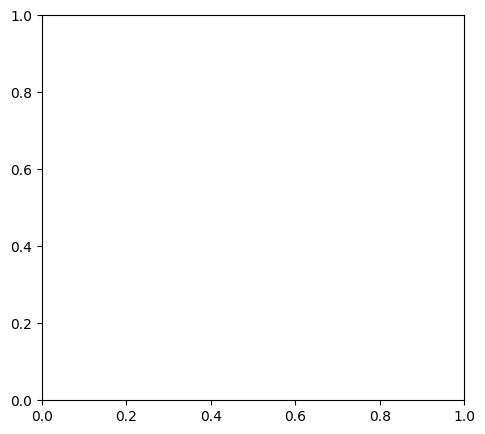

In [21]:
import matplotlib.pyplot as plt  # Import before using plt

# Initialize a figure with a specific size
plt.figure(figsize=(12, 5))

# Subplot for Loss
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, first plot)
plt.plot(history7.history['loss'], label='Train Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.ylim([0.0, 2.0])  # Set y-axis limits
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, second plot)
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.ylim([0.0, 1.0])  # Set y-axis limits
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
